In [1]:
import os
import sys
import time
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

sys.path.append('/Applications/OpenFUSIONToolkit/python')
from OpenFUSIONToolkit.TokaMaker import TokaMaker, load_gs_mesh, gs_Domain, read_eqdsk, save_gs_mesh

In [2]:
plasma_dx = 0.02
coil_dx = 0.04
vv_dx = 0.02
vac_dx = 0.075

In [3]:
import json
with open('nsf_geom.json','r') as fid:
    nsf_geom = json.load(fid)

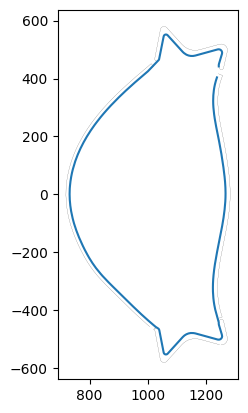

In [4]:
plt.plot( np.array(nsf_geom['div_upper'])[:,0],np.array(nsf_geom['div_upper'])[:,1], linewidth = .1, color = 'k') 
ind_div_u_1 = 16
ind_div_u_2 = 67

ind_in_1 = 2
ind_in_2 = 98

ind_div_l_1 = 45
ind_div_l_2 = 97

ind_out_1 = 47
ind_out_2 = -1
#plt.scatter( np.array(nsf_geom['wall_outboard'])[ind_out_2,0],np.array(nsf_geom['wall_outboard'])[ind_out_2,1], s=.5, color= 'r') 

plt.plot( np.array(nsf_geom['div_lower'])[:,0],np.array(nsf_geom['div_lower'])[:,1], linewidth = .1, color = 'k') 
plt.plot( np.array(nsf_geom['wall_inboard'])[:,0],np.array(nsf_geom['wall_inboard'])[:,1], linewidth = .1, color = 'k') 
plt.plot( np.array(nsf_geom['wall_outboard'])[:,0],np.array(nsf_geom['wall_outboard'])[:,1], linewidth = .1, color = 'k') 
plt.gca().set_aspect(aspect = 1)

limiter = np.concatenate((np.array(nsf_geom['div_upper'])[ind_div_u_1:ind_div_u_2,:], np.flip(np.array(nsf_geom['wall_inboard'])[ind_in_1:ind_in_2,:], 0), np.array(nsf_geom['div_lower'])[ind_div_l_1:ind_div_l_2,:], np.array(nsf_geom['wall_outboard'])[ind_out_1:ind_out_2,:]))

plt.plot(limiter[:,0], limiter[:,1])
#plt.plot(np.array(nsf_geom['div_upper'])[ind_div_u_1:ind_div_u_2,0], np.array(nsf_geom['div_upper'])[ind_div_u_1:ind_div_u_2,1])
#plt.plot(np.array(nsf_geom['wall_inboard'])[ind_in_2:ind_in_1,0], np.array(nsf_geom['wall_inboard'])[ind_in_2:ind_in_1,1])

array([1360.2244873 ,  456.45144653])


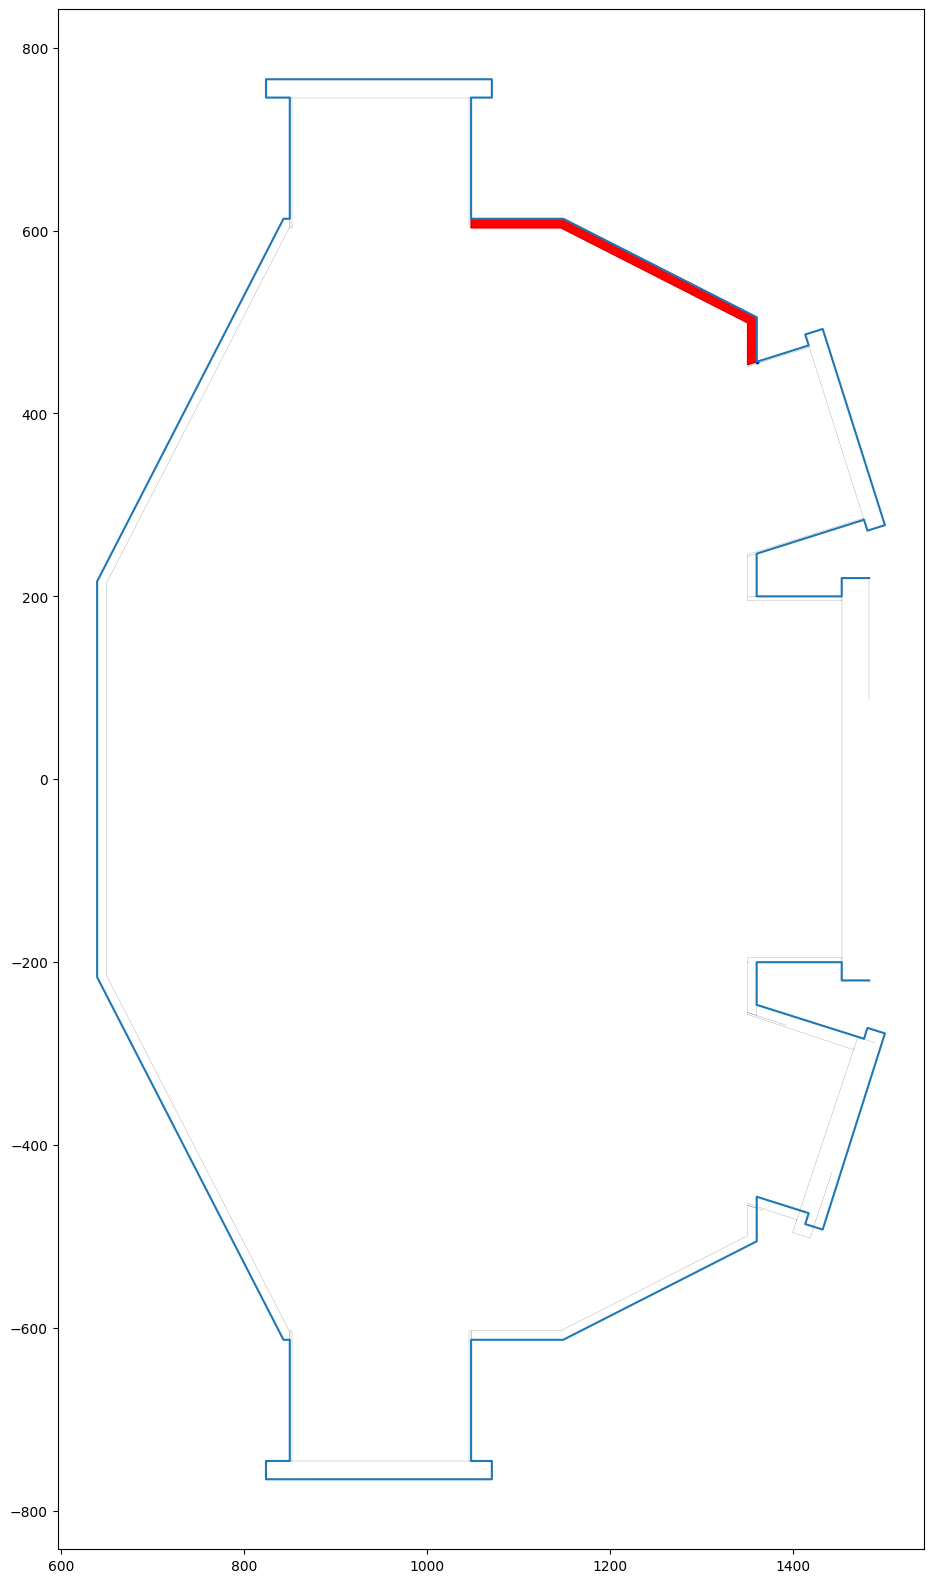

In [5]:
plt.figure(figsize=(20,20))
plt.gca().set_aspect(aspect = 1)
vv_pts = []
for i in range(1,21):
    plt.plot(np.array(nsf_geom['vv_' + str(i)])[:,0],np.array(nsf_geom['vv_' + str(i)])[:,1], color = 'k', linewidth = .1 )


ind = 1
plt.fill(np.array(nsf_geom['vv_' + str(ind)])[:,0],np.array(nsf_geom['vv_' + str(ind)])[:,1], color = 'r' )

j = 4
pt = np.array(nsf_geom['vv_' + str(ind)])[j,:]
plt.scatter(pt[0],pt[1], color = 'b', s = 3)
print(repr(pt))

#20
vv_pts.append([1483.21643066,  220       ])
vv_pts.append([1453.15478516,  220.        ])

#19
vv_pts.append([1453.15478516,  200        ])

#2
vv_pts.append([1360.18237305,  200        ])
vv_pts.append([1360.16589355,  246.6396637 ])

#12
vv_pts.append([1477.53149414,  283.76147461])

#14
vv_pts.append([1481.31152344,  271.8449707 ])
vv_pts.append([1500.40539551,  277.88421631])
vv_pts.append([1432.36584473,  492.38116455])
vv_pts.append([1413.27197266,  486.34191895])

#13
vv_pts.append([1417.05187988,  474.42541504])

#1
vv_pts.append([1360.2244873 ,  456.45144653])
vv_pts.append([1360.24816895,  505.17398071])
vv_pts.append([1148.66931152,  612.88427734])
vv_pts.append([1047.93164062,  612.88427734])

#16
vv_pts.append([1047.93164062,  745.40002441])

#17
vv_pts.append([1070.61853027,  745.40002441])
vv_pts.append([1070.61853027,  765.40002441])
vv_pts.append([823.6418457 , 765.40002441])
vv_pts.append([823.6418457 , 745.40002441])

#15
vv_pts.append([849.66210938, 745.40002441])

#5
vv_pts.append([849.662109, 612.884277])
vv_pts.append([842.786743, 612.884277])
vv_pts.append([638.994019, 216.297623])

vv_outer = np.array(vv_pts)


bottom = np.copy(vv_outer)
bottom[:,1] = -bottom[:,1]
vv_outer = np.concatenate((vv_outer, np.flip(bottom,0)))
plt.plot(vv_outer[:,0], vv_outer[:,1])


array([648.999634, 213.880295])


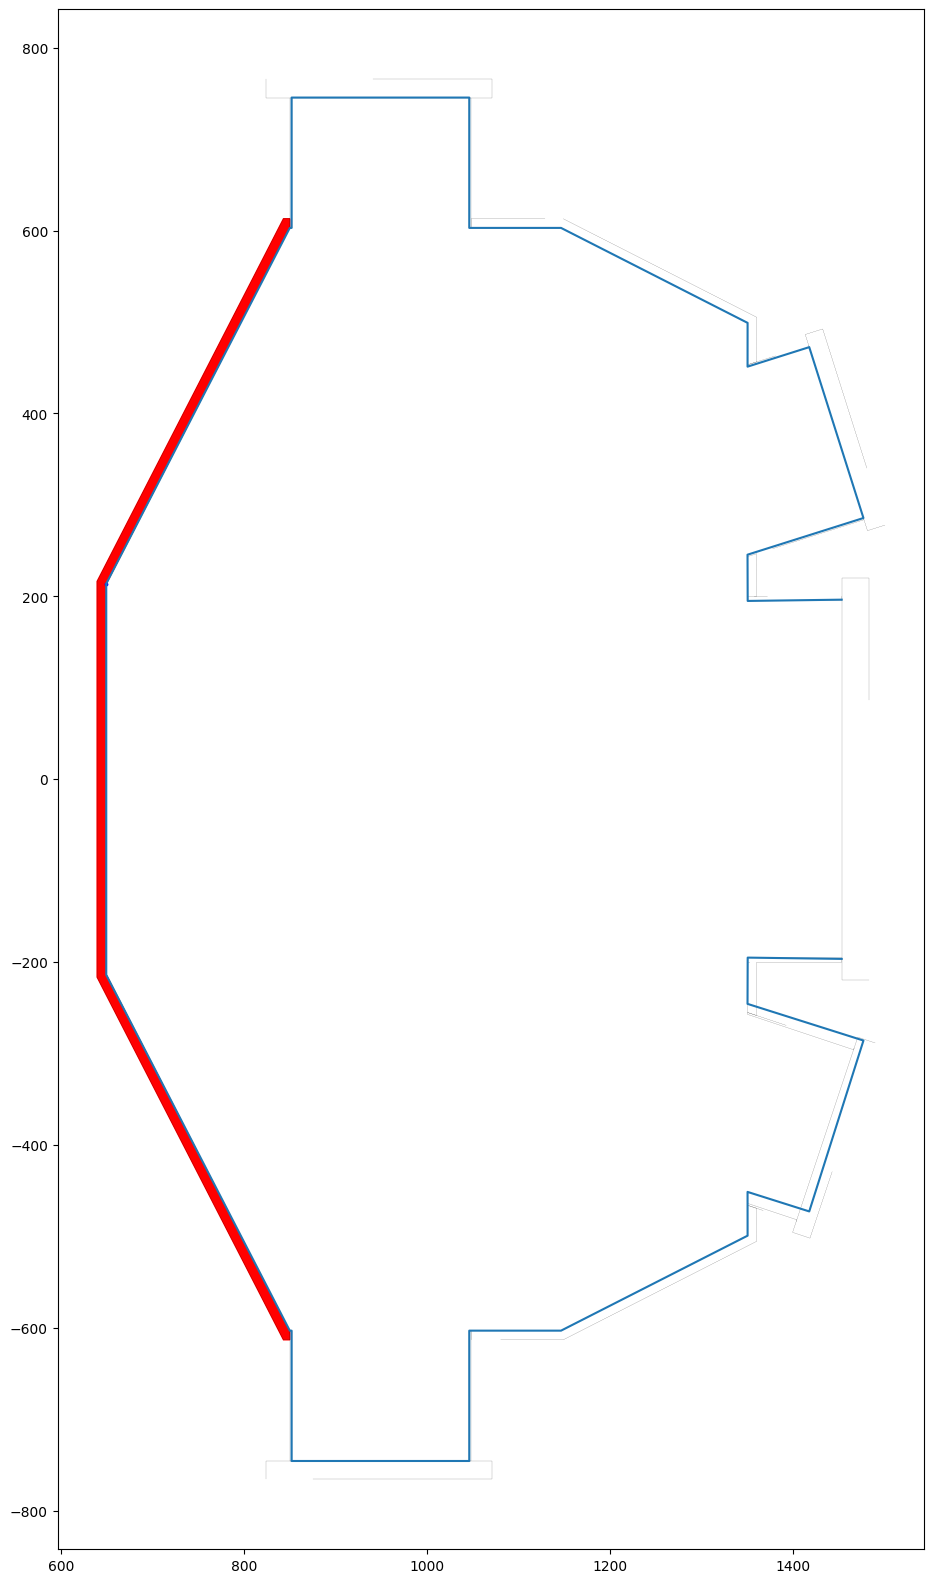

In [6]:
plt.figure(figsize=(20,20))
plt.gca().set_aspect(aspect = 1)
vv_pts = []
for i in range(1,21):
    plt.plot(np.array(nsf_geom['vv_' + str(i)])[:,0],np.array(nsf_geom['vv_' + str(i)])[:,1], color = 'k', linewidth = .1 )


ind = 5
plt.fill(np.array(nsf_geom['vv_' + str(ind)])[:,0],np.array(nsf_geom['vv_' + str(ind)])[:,1], color = 'r' )

j = 14
pt = np.array(nsf_geom['vv_' + str(ind)])[j,:]
plt.scatter(pt[0],pt[1], color = 'b', s = 3)
print(repr(pt))

#20
#19
vv_pts.append([1453.15478516,  196.39318848])
vv_pts.append([1350.35058594,  195        ])

#2
#12
vv_pts.append([1350.16992188,  245.57597351])
vv_pts.append([1476.92675781,  285.66809082])

#14
#13
vv_pts.append([1417.65661621,  472.51879883])
vv_pts.append([1350.20935059,  451.18579102])

#1
vv_pts.append([1350.2487793 ,  499.04458618])
vv_pts.append([1146.26989746,  602.88427734])

#16
vv_pts.append([1045.93115234,  602.88427734])
vv_pts.append([1045.93115234,  745.40002441])

#17
#15
vv_pts.append([851.66265869, 745.40002441])
vv_pts.append([851.66265869, 602.88427734])
vv_pts.append([849.66210938, 602.88427734])

#5
vv_pts.append([648.999634, 213.880295])

vv_inner = np.array(vv_pts)


bottom = np.copy(vv_inner)
bottom[:,1] = -bottom[:,1]
vv_inner = np.concatenate((vv_inner, np.flip(bottom,0)))
plt.plot(vv_inner[:,0], vv_inner[:,1])



(0.35, 0.65)

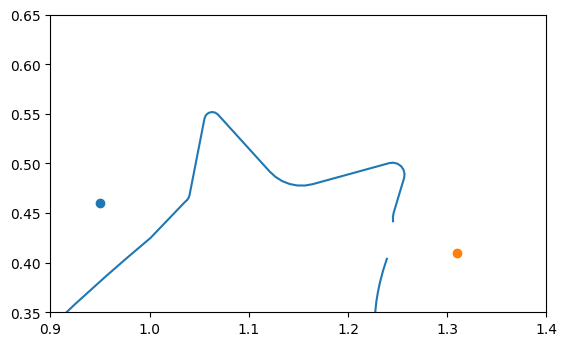

In [7]:
plt.plot(limiter[:,0]/1000, limiter[:,1]/1000)
plt.gca().set_aspect(aspect = 1)
p1 = [0.96 , 0.5]
p1 = [0.95 , 0.46]
plt.scatter(p1[0], p1[1])
p2 = [1.31 , 0.41]
plt.scatter(p2[0], p2[1])
plt.xlim([0.9, 1.4])
plt.ylim([0.35, 0.65])

In [8]:
# Create a G-S domain
gs_mesh = gs_Domain()
# Define region information for mesh
gs_mesh.define_region('air',vac_dx,'boundary')                     # Define the bounding region
gs_mesh.define_region('plasma',plasma_dx,'plasma')                 # Define the plasma region and resolution
gs_mesh.define_region('vacuum',vac_dx,'vacuum')  # Define the vacuum inside the VV
gs_mesh.define_region('vv',vv_dx,'conductor',eta=8.6E-7)

# Define each of the PF coils
gs_mesh.define_region('CS_1',coil_dx,'coil')
gs_mesh.define_region('CS_2',coil_dx,'coil')
gs_mesh.define_region('CS_3',coil_dx,'coil')
gs_mesh.define_region('PF_1U',coil_dx,'coil')
gs_mesh.define_region('PF_1L',coil_dx,'coil')
gs_mesh.define_region('PF_2U',coil_dx,'coil')
gs_mesh.define_region('PF_2L',coil_dx,'coil')
gs_mesh.define_region('PF_3U',coil_dx,'coil')
gs_mesh.define_region('PF_3L',coil_dx,'coil')
gs_mesh.define_region('PF_4U',coil_dx,'coil')
gs_mesh.define_region('PF_4L',coil_dx,'coil')
gs_mesh.define_region('DIV_1U',coil_dx,'coil')
gs_mesh.define_region('DIV_1L',coil_dx,'coil')
gs_mesh.define_region('DIV_2U',coil_dx,'coil')
gs_mesh.define_region('DIV_2L',coil_dx,'coil')

gs_mesh.define_region('in_lower_plate',vv_dx,'conductor',eta=3.8E-8)
gs_mesh.define_region('out_lower_plate',vv_dx,'conductor',eta=3.8E-8)
gs_mesh.define_region('in_upper_plate',vv_dx,'conductor',eta=3.8E-8)
gs_mesh.define_region('out_upper_plate',vv_dx,'conductor',eta=3.8E-8)


In [9]:
# Define geometry
gs_mesh.add_polygon(limiter/1000,'plasma',parent_name='vacuum')  # Define the shape of the limiter
gs_mesh.add_annulus(vv_inner/1000, 'vacuum', vv_outer/1000, 'vv', parent_name = 'air')

# Define each of the PF coils
gs_mesh.add_rectangle(0.58, -0.63, 0.075, 0.4,'CS_1',parent_name = 'air')
gs_mesh.add_rectangle(0.58, 0, 0.075, 0.8,'CS_2',parent_name = 'air')
gs_mesh.add_rectangle(0.58, 0.63, 0.075, 0.4,'CS_3',parent_name = 'air')
gs_mesh.add_polygon(np.array(nsf_geom['PF_1U'])/1000,'PF_1U',parent_name = 'air')
gs_mesh.add_polygon(np.array(nsf_geom['PF_1L'])/1000,'PF_1L',parent_name = 'air')
gs_mesh.add_polygon(np.array(nsf_geom['PF_2U'])/1000, 'PF_2U',parent_name = 'air')
gs_mesh.add_polygon(np.array(nsf_geom['PF_2L'])/1000, 'PF_2L',parent_name = 'air')
gs_mesh.add_polygon(np.array(nsf_geom['PF_3U'])/1000, 'PF_3U',parent_name = 'air')
gs_mesh.add_polygon(np.array(nsf_geom['PF_3L'])/1000, 'PF_3L',parent_name = 'air')
gs_mesh.add_polygon(np.array(nsf_geom['PF_4U'])/1000, 'PF_4U',parent_name = 'air')
gs_mesh.add_polygon(np.array(nsf_geom['PF_4L'])/1000,'PF_4L',parent_name = 'air')

size = 0.05
gs_mesh.add_rectangle(p1[0], p1[1], size,size,'DIV_1U',parent_name = 'vacuum')
gs_mesh.add_rectangle(p1[0], -p1[1], size, size,'DIV_1L',parent_name = 'vacuum')
gs_mesh.add_rectangle(p2[0], p2[1], size, size,'DIV_2U',parent_name = 'vacuum')
gs_mesh.add_rectangle(p2[0], -p2[1], size, size,'DIV_2L',parent_name = 'vacuum')


gs_mesh.add_polygon(np.array(nsf_geom['in_lower_plate'])/1000,'in_lower_plate',parent_name='vacuum')
gs_mesh.add_polygon(np.array(nsf_geom['out_lower_plate'])/1000,'out_lower_plate',parent_name='vacuum')
gs_mesh.add_polygon(np.array(nsf_geom['in_upper_plate'])/1000,'in_upper_plate',parent_name='vacuum')
gs_mesh.add_polygon(np.array(nsf_geom['out_upper_plate'])/1000,'out_upper_plate',parent_name='vacuum')

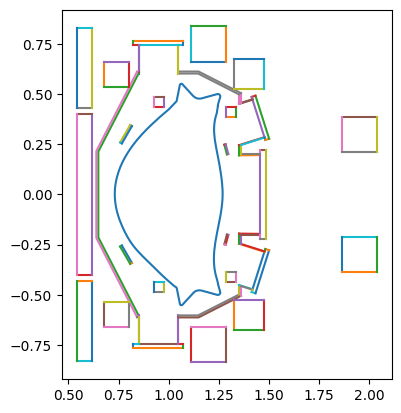

In [10]:
fig, ax = plt.subplots(1,1)
for region in gs_mesh.regions:
    region.plot_segments(fig,ax)
ax.set_aspect('equal','box')

In [11]:
mesh_pts, mesh_lc, mesh_reg = gs_mesh.build_mesh()
coil_dict = gs_mesh.get_coils()
cond_dict = gs_mesh.get_conductors()

Assembling regions:
  # of unique points    = 967
  # of unique segments  = 149
Generating mesh:
  # of points  = 4421
  # of cells   = 8724
  # of regions = 22


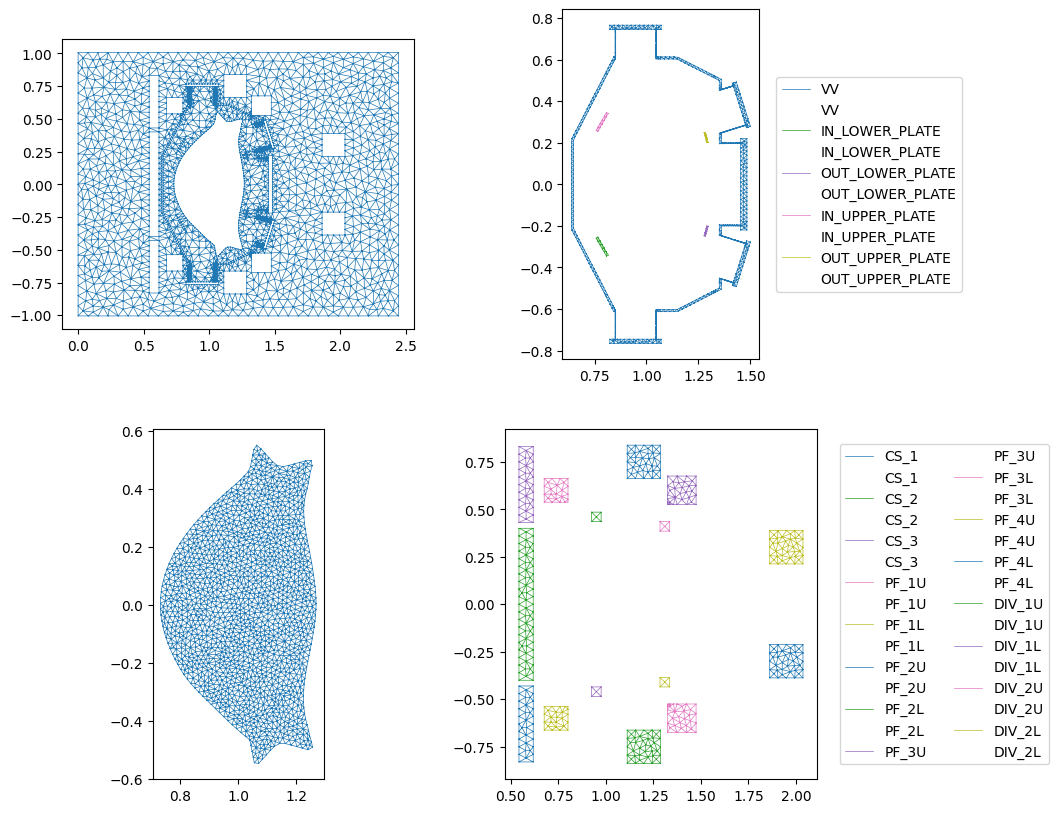

In [12]:
fig, ax = plt.subplots(2,2,figsize=(10,10))
ax[0,0].triplot(mesh_pts[:,0],mesh_pts[:,1],mesh_lc[mesh_reg==2,:],lw=0.5)
ax[1,0].triplot(mesh_pts[:,0],mesh_pts[:,1],mesh_lc[mesh_reg==1,:],lw=0.5)
for key, cond in cond_dict.items():
    ax[0,1].triplot(mesh_pts[:,0],mesh_pts[:,1],mesh_lc[mesh_reg==cond['reg_id'],:],lw=0.5,label=key)
for key, coil in coil_dict.items():
    ax[1,1].triplot(mesh_pts[:,0],mesh_pts[:,1],mesh_lc[mesh_reg==coil['reg_id'],:],lw=0.5,label=key)
for ax_tmp in ax.flatten():
    ax_tmp.set_aspect('equal','box')
ax[0,1].legend(bbox_to_anchor=(1.05,0.5), loc='center left')
_ = ax[1,1].legend(bbox_to_anchor=(1.05,0.5), ncol=2, loc='center left')

In [13]:
save_gs_mesh(mesh_pts,mesh_lc,mesh_reg,coil_dict,cond_dict,'nextstep_divcoil.h5')